1. import lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


2. load data

In [9]:
dataset = pd.read_csv('heart-disease.csv')

3.EDA

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# stati summ
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,12

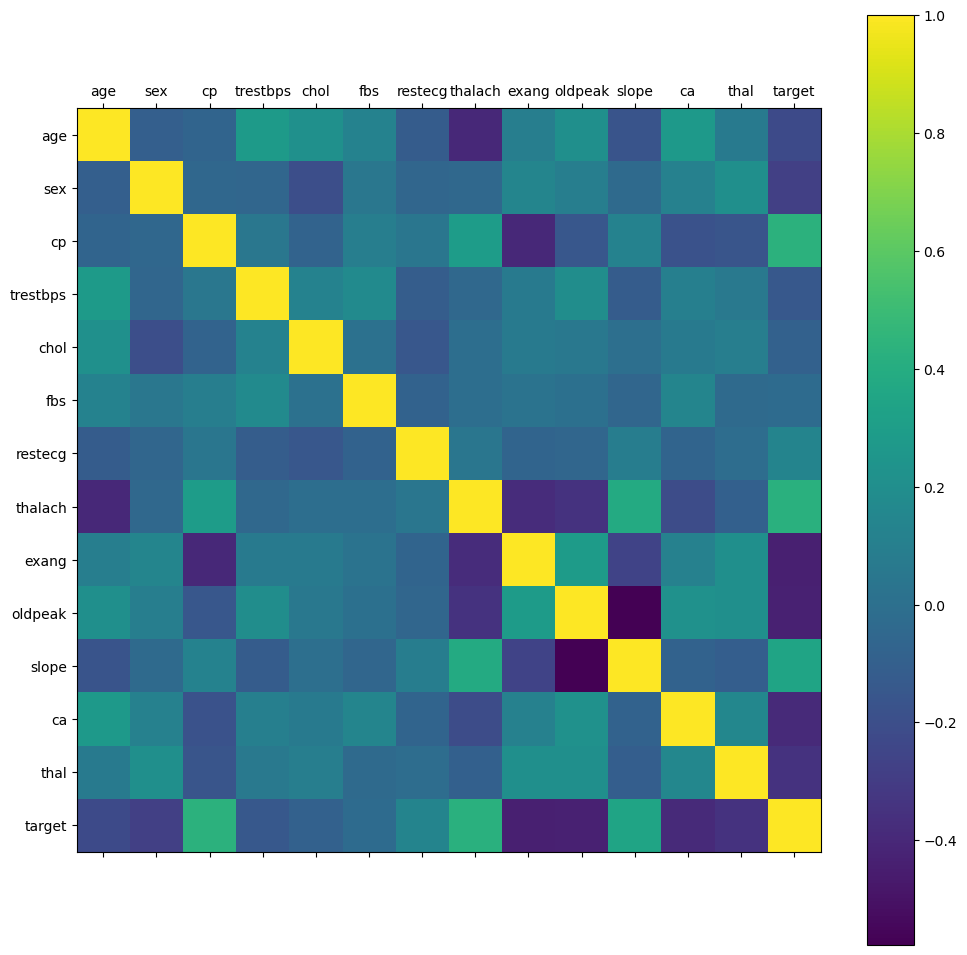

In [22]:
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]),dataset.columns)
plt.yticks(np.arange(dataset.shape[1]),dataset.columns)
plt.colorbar()
#plt.show()

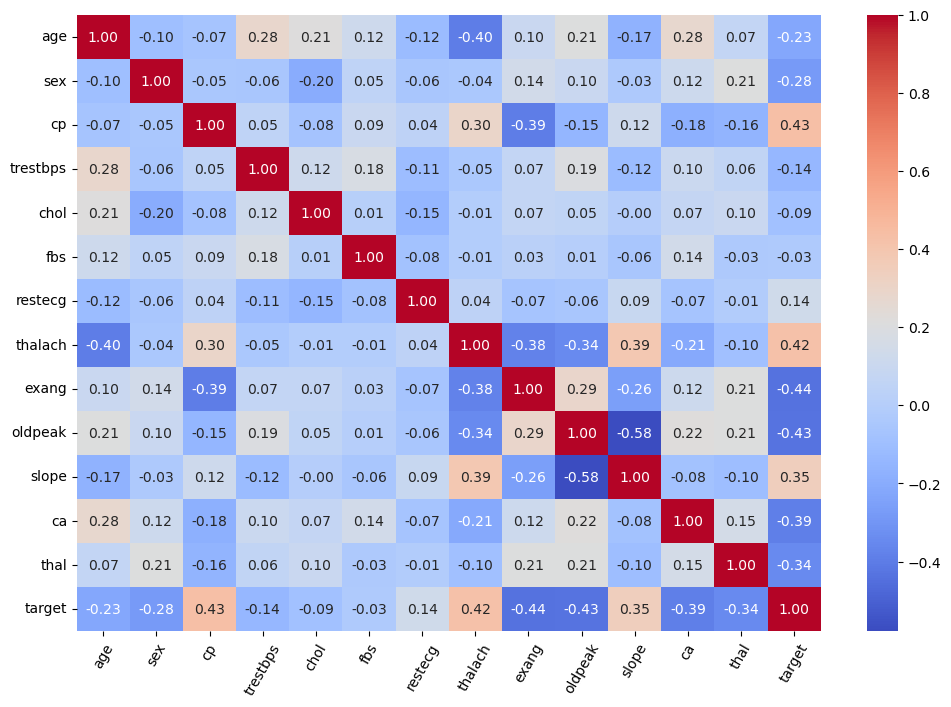

In [30]:
import seaborn as sns
corr_matrix = dataset.corr()
plt.figure(figsize=(12, 8))  # Optional: Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=dataset.columns, yticklabels=dataset.columns)
plt.xticks(rotation=60)

# Show the plot
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

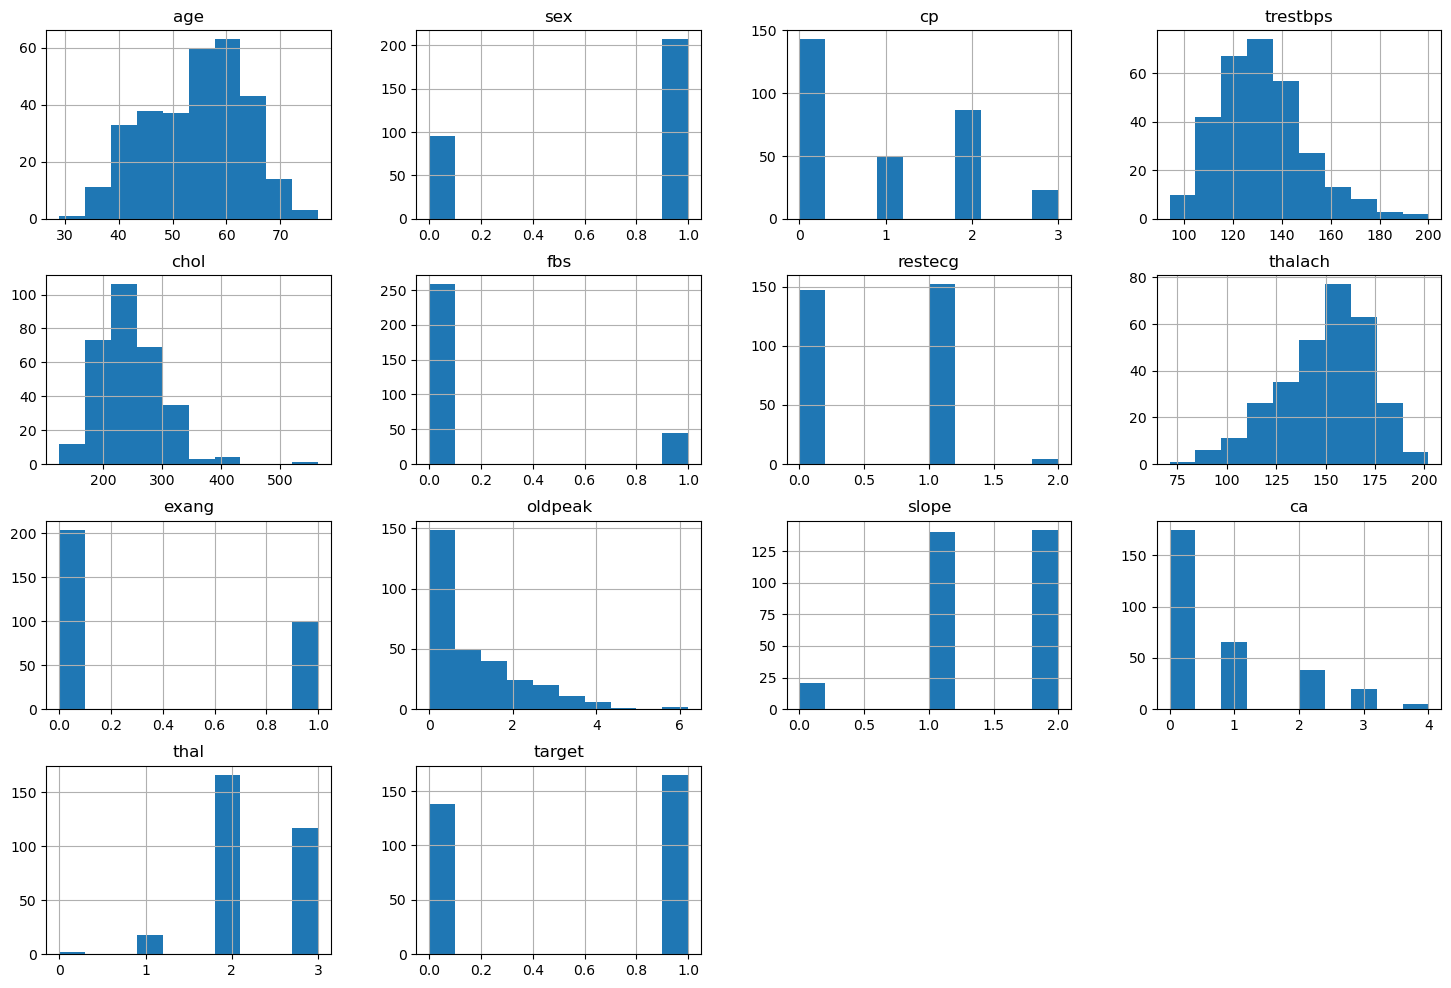

In [32]:
dataset.hist()

Text(0.5, 1.0, 'Count of each target')

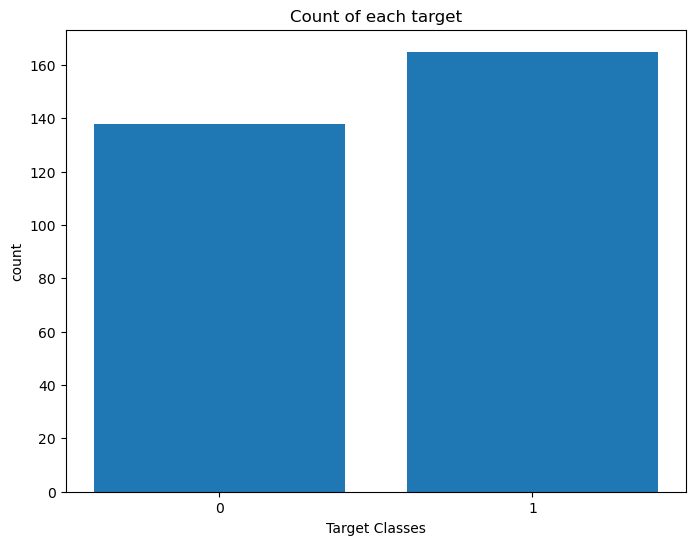

In [36]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(),dataset['target'].value_counts())
plt.xticks([0,1])
plt.xlabel("Target Classes")
plt.ylabel("count")
plt.title("Count of each target")

In [38]:
dataset = pd.get_dummies(dataset,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [40]:
std_scl = StandardScaler()
cl_2_scl = ['age','trestbps', 'chol', 'thalach','oldpeak']
dataset[cl_2_scl] = std_scl.fit_transform(dataset[cl_2_scl])

In [42]:
x = dataset.drop(['target'],axis = 1)
y = dataset['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

KNN = > Algo

In [45]:
knn_score = []
for k in range(1,21):
    knn_classi = KNeighborsClassifier(n_neighbors=k)
    knn_classi.fit(x_train,y_train)
    knn_score.append(knn_classi.score(x_test,y_test))

([<matplotlib.axis.XTick at 0x21c3fdae0c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

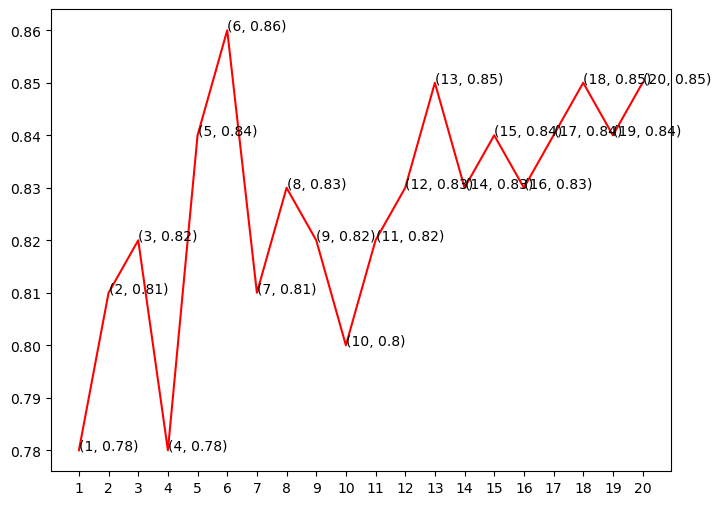

In [47]:
plt.plot([k for k in range(1,21)], knn_score, color = 'red')
for i in range(1,21):
    plt.text(i, knn_score[i-1],(i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])

SVM = > Algo

In [49]:
svc_score = []
kernels = ['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_classi = SVC(kernel=kernels[i])
    svc_classi.fit(x_train,y_train)
    svc_score.append(svc_classi.score(x_test,y_test))

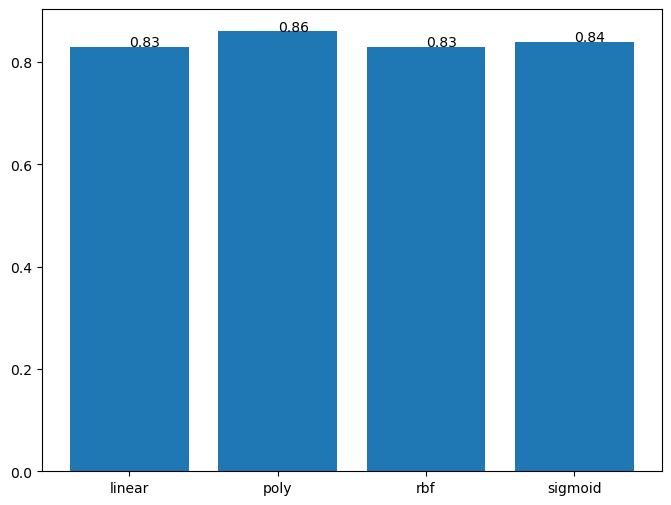

In [55]:
plt.bar(kernels, svc_score)
for i in range(len(kernels)):
    plt.text(i, svc_score[i],svc_score[i])
